<center><h1>Last_First_HW8</h1></center>

Name: Surbhi Khatri
<br>
Github Username: surbhikhatri
<br>
USC ID: 9893833133
<br>
Using my 3 late days, never used before. actual deadline 28th November, submitting 1st december

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

Import packages

In [112]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.utils import shuffle

from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score


from sklearn.exceptions import ConvergenceWarning
from sklearn.cluster import SpectralClustering
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV,train_test_split
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV, KFold
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=ConvergenceWarning)

### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [113]:
df = pd.read_csv("./../data/wdbc.data", header=None)
df.columns = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean','fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',  'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


### (b) Monte-Carlo Simulation

#### (i) Supervised Learning

/Users/surbhikhatri/anaconda3/envs/homework-2-surbhikhatri/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/surbhikhatri/anaconda3/envs/homework-2-surbhikhatri/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/surbhikhatri/anaconda3/envs/homework-2-surbhikhatri/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/surbhikhatri/anaconda3/envs/homework-2-surbhikhatri/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/surbhikhatri/anaconda3/envs/homework-2-surbhikhatri/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarnin

Train mean F1 score: 0.9850817451296197
Train mean Accuracy: 0.9861111111111109
Train mean Recall: 0.9830426436308789
Train Mean Precision: 0.9872993678777775

Test mean F1 score: 0.972069634990418
Test mean Accuracy: 0.9740412979351035
Test mean Recall: 0.9702660406885758
Test mean Precision: 0.9747629993292001

 train confusion matrix 
 [[286   0]
 [  5 165]]

 train confusion matrix 
 [[69  2]
 [ 3 39]]


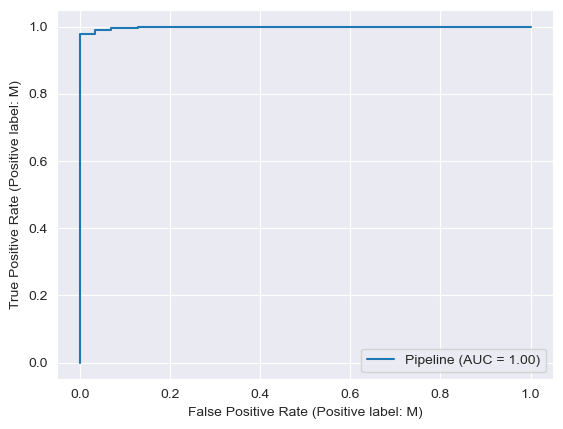

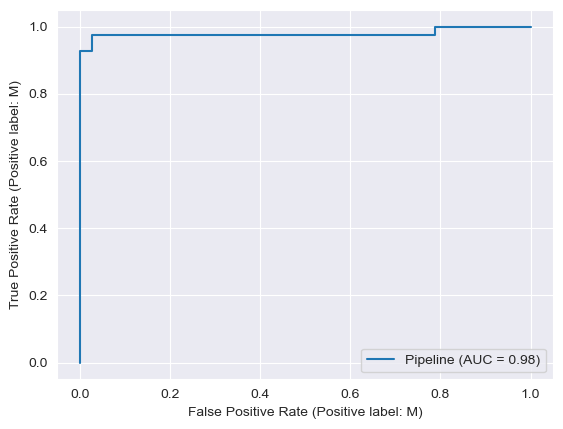

In [114]:
comparison_table = pd.DataFrame(columns=['Model','train_Accuracy','train_Precision','train_Recall','train_F1','test_Accuracy','test_Precision','test_Recall','test_F1_'])

# arrays to store recall, precision, accuracy and f1 score for 30 iterations, and calculate mean after that.
# calculate for both train and test sets
train_precision = []
train_recall = []
test_precision = []
test_recall = []
train_f1 = []
test_f1 = []
train_accuracy= []
test_accuracy = []


# perform 30 times
for i in range(30):
    # pick random data
    df = shuffle(df)

    df_M = df[df['diagnosis']=='M']
    df_B = df[df['diagnosis']=='B']

    # 20% of both the positive and nega-tive classes as the test se
    train_df = pd.concat([df_M.iloc[len(df_M)//5:], df_B.iloc[len(df_B)//5:]], ignore_index=True)
    test_df = pd.concat([df_M.iloc[:len(df_M)//5], df_B.iloc[:len(df_B)//5]], ignore_index=True)

    # cross validation
    param_grid = {'linearsvc__C': [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4]}
    cv = KFold(n_splits=5, shuffle=True)

    # similar to previous assignment
    model = make_pipeline(StandardScaler(), LinearSVC(penalty='l1', dual=False,max_iter=10000))
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

    grid_search.fit(train_df[train_df.columns[2:]], train_df['diagnosis'])
    l1_SVC = grid_search.best_estimator_.fit(train_df[train_df.columns[2:]], train_df['diagnosis'])

    # training measures:
    y_pred = l1_SVC.predict(train_df[train_df.columns[2:]])
    measures = precision_recall_fscore_support(train_df['diagnosis'], y_pred, average='macro')
    train_precision.append(measures[0])
    train_recall.append(measures[1])
    train_f1.append(measures[2])
    train_accuracy.append(l1_SVC.score(train_df[train_df.columns[2:]], train_df['diagnosis']))

    # testing measures
    y_pred = l1_SVC.predict(test_df[test_df.columns[2:]])
    measures = precision_recall_fscore_support(test_df['diagnosis'], y_pred, average='macro')
    test_precision.append(measures[0])
    test_recall.append(measures[1])
    test_f1.append(measures[2])
    test_accuracy.append(l1_SVC.score(test_df[test_df.columns[2:]], test_df['diagnosis']))

print("Train mean F1 score:", np.mean(train_f1))
print("Train mean Accuracy:", np.mean(train_accuracy))
print("Train mean Recall:", np.mean(train_recall))
print("Train Mean Precision:", np.mean(train_precision))
print()
print("Test mean F1 score:", np.mean(test_f1))
print("Test mean Accuracy:", np.mean(test_accuracy))
print("Test mean Recall:", np.mean(test_recall))
print("Test mean Precision:", np.mean(test_precision))

RocCurveDisplay.from_estimator(l1_SVC, train_df[train_df.columns[2:]], train_df['diagnosis'])
y_pred = l1_SVC.predict(train_df[train_df.columns[2:]])
print("\n", "train confusion matrix", "\n", confusion_matrix(train_df['diagnosis'], y_pred))



RocCurveDisplay.from_estimator(l1_SVC, test_df[test_df.columns[2:]], test_df['diagnosis'])
y_pred=l1_SVC.predict(test_df[test_df.columns[2:]])
print("\n", "train confusion matrix", "\n", confusion_matrix(test_df['diagnosis'], y_pred))


In [115]:
comparison_table.loc[0] = [
    "l1_SVC",
    np.mean(train_accuracy), np.mean(train_precision), np.mean(train_recall), np.mean(train_f1),
    np.mean(test_accuracy), np.mean(test_precision), np.mean(test_recall), np.mean(test_f1)
]

#### (ii) Semi-Supervised Learning/ Self-training

/Users/surbhikhatri/anaconda3/envs/homework-2-surbhikhatri/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/surbhikhatri/anaconda3/envs/homework-2-surbhikhatri/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/surbhikhatri/anaconda3/envs/homework-2-surbhikhatri/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/surbhikhatri/anaconda3/envs/homework-2-surbhikhatri/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/surbhikhatri/anaconda3/envs/homework-2-surbhikhatri/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarnin

Train mean F1 score: 0.9530489371033352
Train mean Accuracy: 0.9562865497076022
Train mean Recall: 0.950955710955711
Train Mean Precision: 0.9559160034156551

Test mean F1 score: 0.9917482557964444
Test mean Accuracy: 0.992330383480826
Test mean Recall: 0.9908171249720545
Test mean Precision: 0.9927940311119665

 train confusion matrix 
 [[271  15]
 [ 10 160]]

 train confusion matrix 
 [[71  0]
 [ 0 42]]


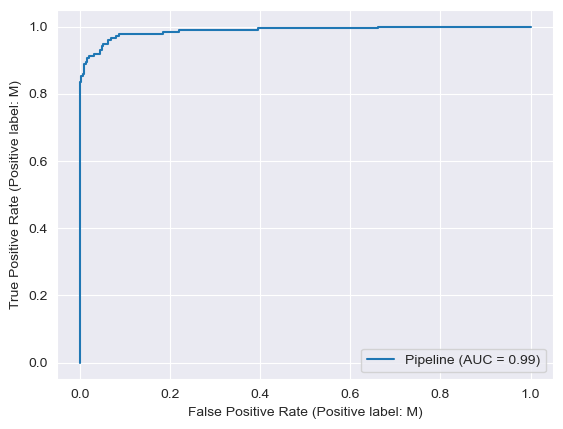

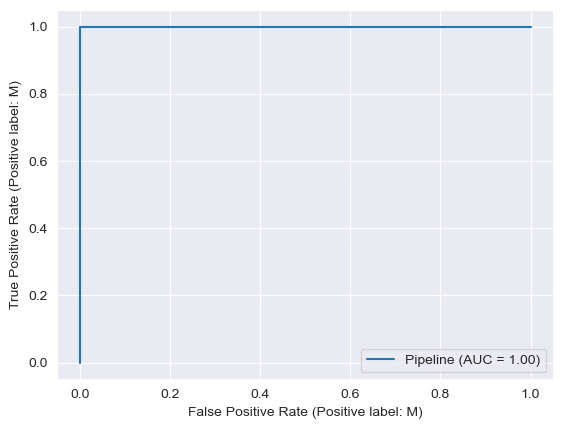

In [116]:
# arrays to store recall, precision, accuracy and f1 score for 30 iterations, and calculate mean after that.
# calculate for both train and test sets
train_precision = []
train_recall = []
test_precision = []
test_recall = []
train_f1 = []
test_f1 = []
train_accuracy= []
test_accuracy = []

for i in range(30):
    # pick random data
    df = shuffle(df)

    df_M = df[df['diagnosis'] == 'M']
    df_B = df[df['diagnosis'] == 'B']

    # 20% of both the positive and nega-tive classes as the test se
    train_df = pd.concat([df_M.iloc[len(df_M)//5:], df_B.iloc[len(df_B)//5:]], ignore_index=True)
    test_df = pd.concat([df_M.iloc[:len(df_M)//5], df_B.iloc[:len(df_B)//5]], ignore_index=True)

    train_df_B = test_df[test_df['diagnosis']=='B']
    train_df_M = test_df[test_df['diagnosis']=='M']

    train_df_labelled = pd.concat([train_df_M.iloc[len(train_df_M)//2:], train_df_B.iloc[len(train_df_B)//2:]],ignore_index=True)
    train_df_unlabelled = pd.concat([train_df_M.iloc[:len(train_df_M)//2], train_df_B.iloc[:len(train_df_B)//2]],ignore_index=True)
    train_df_unlabelled = train_df_unlabelled.copy()

    # similar to prev question cv, part A to train L1 penalized
    param_grid = {'linearsvc__C': [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4]}
    cv = KFold(n_splits=5, shuffle=True)
    model = make_pipeline(StandardScaler(), LinearSVC(penalty='l1', dual=False))
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

    while train_df_unlabelled.shape[0] > 0:
        grid_search.fit(train_df_labelled[train_df_labelled.columns[2:]], train_df_labelled['diagnosis'])
        l1_SVC = grid_search.best_estimator_.fit(train_df_labelled[train_df_labelled.columns[2:]], train_df_labelled['diagnosis'])
        distances = l1_SVC.decision_function(train_df_unlabelled[train_df_unlabelled.columns[2:]])
        # Part B Find the unlabeled data point that is the farthest to the decision boundary of the SVM
        farthest_index = np.argmax(distances)
        prediction = l1_SVC.predict(train_df_unlabelled.iloc[farthest_index][train_df_labelled.columns[2:]].values.reshape(1, -1))
        train_df_unlabelled.iloc[farthest_index]['diagnosis'] = prediction
        row_to_append = train_df_unlabelled.iloc[farthest_index: farthest_index + 1]  # Select the row to append
        train_df_labelled = pd.concat([train_df_labelled, row_to_append], ignore_index=True)
        train_df_unlabelled = train_df_unlabelled.drop(index=farthest_index).reset_index(drop=True)


    # training measures:
    y_pred = l1_SVC.predict(train_df[train_df.columns[2:]])
    measures = precision_recall_fscore_support(train_df['diagnosis'], y_pred, average='macro')
    train_precision.append(measures[0])
    train_recall.append(measures[1])
    train_f1.append(measures[2])
    train_accuracy.append(l1_SVC.score(train_df[train_df.columns[2:]], train_df['diagnosis']))

    # testing measures
    y_pred = l1_SVC.predict(test_df[test_df.columns[2:]])
    measures = precision_recall_fscore_support(test_df['diagnosis'], y_pred, average='macro')
    test_precision.append(measures[0])
    test_recall.append(measures[1])
    test_f1.append(measures[2])
    test_accuracy.append(l1_SVC.score(test_df[test_df.columns[2:]], test_df['diagnosis']))



print("Train mean F1 score:", np.mean(train_f1))
print("Train mean Accuracy:", np.mean(train_accuracy))
print("Train mean Recall:", np.mean(train_recall))
print("Train Mean Precision:", np.mean(train_precision))
print()
print("Test mean F1 score:", np.mean(test_f1))
print("Test mean Accuracy:", np.mean(test_accuracy))
print("Test mean Recall:", np.mean(test_recall))
print("Test mean Precision:", np.mean(test_precision))

RocCurveDisplay.from_estimator(l1_SVC, train_df[train_df.columns[2:]], train_df['diagnosis'])
y_pred = l1_SVC.predict(train_df[train_df.columns[2:]])
print("\n", "train confusion matrix", "\n", confusion_matrix(train_df['diagnosis'], y_pred))

RocCurveDisplay.from_estimator(l1_SVC, test_df[test_df.columns[2:]], test_df['diagnosis'])
y_pred=l1_SVC.predict(test_df[test_df.columns[2:]])
print("\n", "train confusion matrix", "\n", confusion_matrix(test_df['diagnosis'], y_pred))

In [117]:
comparison_table.loc[1] = [
    "SS l1_svm",
    np.mean(train_accuracy), np.mean(train_precision), np.mean(train_recall), np.mean(train_f1),
    np.mean(test_accuracy), np.mean(test_precision), np.mean(test_recall), np.mean(test_f1)
]

#### (iii) Unsupervised Learning

##### (A)

Ans (A): we can start the algorithm multipole time wiht different starting points to ensure we don't get stuck

##### (B)

In [118]:
df = shuffle(df)
df_M = df[df['diagnosis'] == 'M']
df_B = df[df['diagnosis'] == 'B']

# 20% of both the positive and nega-tive classes as the test se
train_df = pd.concat([df_M.iloc[len(df_M)//5:], df_B.iloc[len(df_B)//5:]], ignore_index=True)
test_df = pd.concat([df_M.iloc[:len(df_M)//5], df_B.iloc[:len(df_B)//5]], ignore_index=True)

# given k = 2
kmeans = KMeans(init="random", n_clusters=2, random_state=42, n_init=30)
kmeans.fit(train_df[train_df.columns[2:]])


KMeans(init='random', n_clusters=2, n_init=30, random_state=42)

Train mean F1 score: 0.9899972214504028
Train mean Accuracy: 0.9900000000000001
Train mean Recall: 0.9903225806451613
Train Mean Precision: 0.9900000000000001

 train confusion matrix 
 [[29  0]
 [ 1 30]]

Test mean F1 score: 0.5257988055292377
Test mean Accuracy: 0.5938053097345133
Test mean Recall: 0.6383467471495641
Test mean Precision: 0.5181532893789418

 train confusion matrix 
 [[71  0]
 [16 26]]


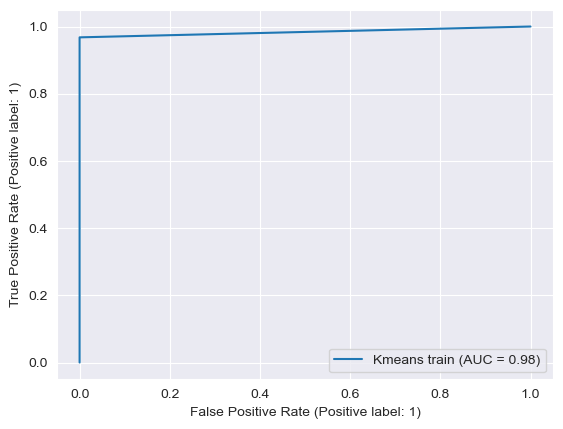

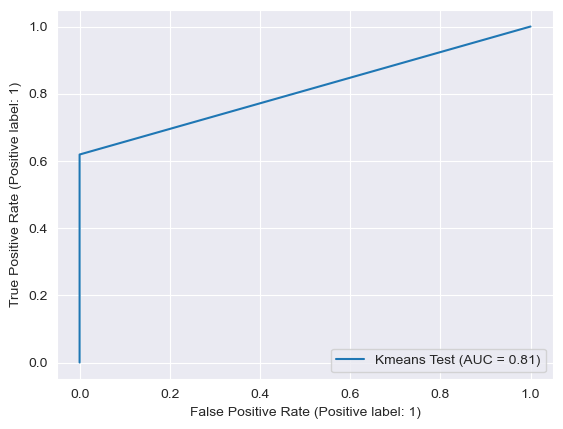

In [119]:
# arrays to store recall, precision, accuracy and f1 score for 30 iterations, and calculate mean after that.
# calculate for both train and test sets (unsupervised)
train_precision = []
train_recall = []
test_precision = []
test_recall = []
train_f1 = []
test_f1 = []
train_accuracy= []
test_accuracy = []

for i in range(30):
    # pick random data
    df = shuffle(df)

    df_M = df[df['diagnosis'] == 'M']
    df_B = df[df['diagnosis'] == 'B']

    # 20% of both the positive and nega-tive classes as the test se
    train_df = pd.concat([df_M.iloc[len(df_M)//5:], df_B.iloc[len(df_B)//5:]], ignore_index=True)
    test_df = pd.concat([df_M.iloc[:len(df_M)//5], df_B.iloc[:len(df_B)//5]], ignore_index=True)



    # kmeans with cluster 2
    kmeans = KMeans(init="random", n_clusters=2, random_state=42, n_init=1)
    kmeans.fit(train_df[train_df.columns[2:]])
    d = kmeans.transform(train_df[train_df.columns[2:]])
    labels = np.array(kmeans.labels_)

    # Compute the centers of the two clusters and find the closest 30 data points to each center
    center_0 = d[:, 0].argsort()[:30]
    center_1 = d[:, 1].argsort()[:30]

    majority_poling = [
        train_df.iloc[center_0]['diagnosis'].map({'B': 0, 'M': 1}).value_counts().idxmax(),
        train_df.iloc[center_1]['diagnosis'].map({'B': 0, 'M': 1}).value_counts().idxmax()
    ]
    y_pred = pd.concat([
        pd.DataFrame(majority_poling[0] for _ in range(30)),
        pd.DataFrame(majority_poling[1] for _ in range(30))
    ])

    y_actual = pd.concat([
        train_df.iloc[center_0]['diagnosis'],
        train_df.iloc[center_1]['diagnosis']
    ])
    y_actual = y_actual.map({'B':0, 'M':1})
    measures = precision_recall_fscore_support(y_actual, y_pred, average='macro')

    # training measures:
    train_precision.append(measures[0])
    train_recall.append(measures[1])
    train_f1.append(measures[2])
    train_accuracy.append(accuracy_score(y_actual, y_pred))


    y_pred = kmeans.predict(test_df[test_df.columns[2:]])
    np.place(y_pred, y_pred == 1, majority_poling[1])
    np.place(y_pred, y_pred == 0, majority_poling[0])
    majority_poling = [
        train_df.iloc[center_0]['diagnosis'].map({'B': 0, 'M': 1}).value_counts().idxmax(),
        train_df.iloc[center_1]['diagnosis'].map({'B': 0, 'M': 1}).value_counts().idxmax()
    ]
    y_actual = test_df['diagnosis']
    y_actual = y_actual.map({'B':0, 'M':1})
    measures = precision_recall_fscore_support(y_actual, y_pred, average='macro')

    # testing measures
    test_precision.append(measures[0])
    test_recall.append(measures[1])
    test_f1.append(measures[2])
    test_accuracy.append(accuracy_score(y_actual, y_pred))



print("Train mean F1 score:", np.mean(train_f1))
print("Train mean Accuracy:", np.mean(train_accuracy))
print("Train mean Recall:", np.mean(train_recall))
print("Train Mean Precision:", np.mean(train_precision))
y_pred = pd.concat([
    pd.DataFrame(majority_poling[0] for _ in range(30)),
    pd.DataFrame(majority_poling[1] for _ in range(30))
])
y_true = pd.concat([
    train_df.iloc[center_0]['diagnosis'],
    train_df.iloc[center_1]['diagnosis']]).map({'B':0,'M':1})
RocCurveDisplay.from_predictions(y_true, y_pred, name="Kmeans train")
print("\n", "train confusion matrix", "\n", confusion_matrix(y_true, y_pred))

print()
print("Test mean F1 score:", np.mean(test_f1))
print("Test mean Accuracy:", np.mean(test_accuracy))
print("Test mean Recall:", np.mean(test_recall))
print("Test mean Precision:", np.mean(test_precision))

y_pred = kmeans.predict(test_df[test_df.columns[2:]])
np.place(y_pred, y_pred==0, majority_poling[0])
np.place(y_pred, y_pred==1, majority_poling[1])
y_actual = test_df['diagnosis'].map({'B':0,'M':1})

RocCurveDisplay.from_predictions(y_actual, y_pred, name="Kmeans Test")
print("\n", "train confusion matrix", "\n", confusion_matrix(y_actual, y_pred))


In [120]:
comparison_table.loc[2] = [
    "Unsupervised Kmeams",
    np.mean(train_accuracy), np.mean(train_precision), np.mean(train_recall), np.mean(train_f1),
    np.mean(test_accuracy), np.mean(test_precision), np.mean(test_recall), np.mean(test_f1)
]

#### (iv) Spectral Clustering


Test mean F1 score: 0.5314398486541254
Test mean Accuracy: 0.5840707964601768
Test mean Recall: 0.6255756762799016
Test mean Precision: 0.5156789609946671

 test confusion matrix 
 [[71  0]
 [13 29]]
Train mean F1 score: 1.0
Train mean Accuracy: 1.0
Train mean Recall: 1.0
Train Mean Precision: 1.0

 train confusion matrix 
 [[29  0]
 [ 1 30]]


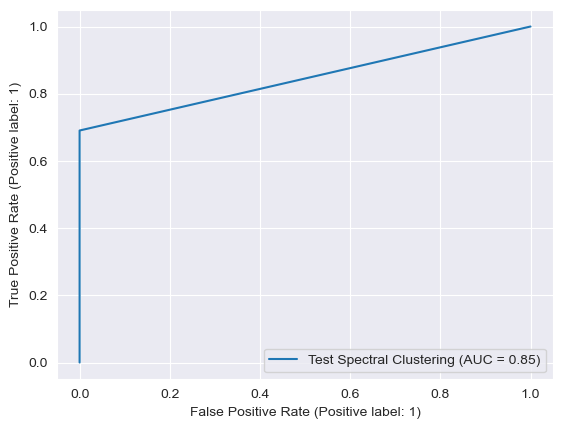

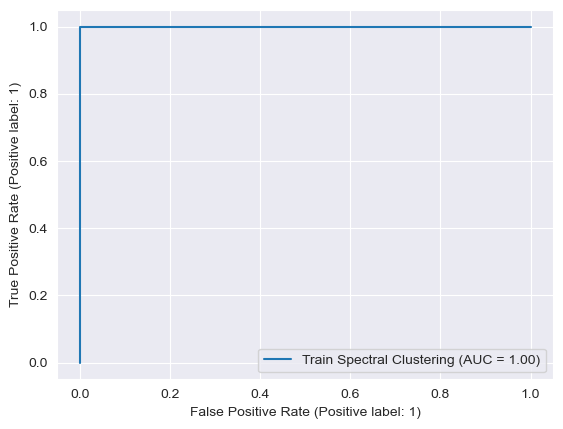

In [121]:
len(train_df[train_df["diagnosis"]=="B"])/len(train_df[train_df["diagnosis"]=="M"])

# gammas=[.001,.01,.1,1,10,100,1000]
# for gamma in gammas:len(df_M)/len(df_B)
# arrays to store recall, precision, accuracy and f1 score for 30 iterations, and calculate mean after that.
# calculate for both train and test sets (unsupervised)
train_precision = []
train_recall = []
test_precision = []
test_recall = []
train_f1 = []
test_f1 = []
train_accuracy= []
test_accuracy = []

for i in range(30):

    # pick random data
    df = shuffle(df)

    df_M = df[df['diagnosis'] == 'M']
    df_B = df[df['diagnosis'] == 'B']

    # 20% of both the positive and nega-tive classes as the test se
    train_df = pd.concat([df_M.iloc[len(df_M)//5:], df_B.iloc[len(df_B)//5:]], ignore_index=True)
    test_df = pd.concat([df_M.iloc[:len(df_M)//5], df_B.iloc[:len(df_B)//5]], ignore_index=True)

    # gamma =.00000000001
    spectral_clustering = SpectralClustering(n_clusters=2, affinity="rbf", assign_labels="discretize", gamma=.0000000001)
    labels = spectral_clustering.fit_predict(train_df[train_df.columns[2:]])

    center_0 = np.where(labels == 0)[0][60:90]
    center_1 = np.where(labels == 1)[0][:30]


    majority_poling = [
        train_df.iloc[center_0]['diagnosis'].map({'B': 0, 'M': 1}).value_counts().idxmax(),
        train_df.iloc[center_1]['diagnosis'].map({'B': 0, 'M': 1}).value_counts().idxmax()
    ]

    y_pred = pd.concat([
        pd.DataFrame(majority_poling[0] for _ in range(30)),
        pd.DataFrame(majority_poling[1] for _ in range(30))
    ])

    y_actual = pd.concat([
        train_df.iloc[center_0]['diagnosis'],
        train_df.iloc[center_1]['diagnosis']
    ])
    y_actual = y_actual.map({'B':0, 'M':1})
    measures = precision_recall_fscore_support(y_actual, y_pred, average='macro')

    # training measures:
    train_precision.append(measures[0])
    train_recall.append(measures[1])
    train_f1.append(measures[2])
    train_accuracy.append(accuracy_score(y_actual, y_pred))


    y_pred_test = spectral_clustering.fit_predict(test_df[test_df.columns[2:]])
    np.place(y_pred_test, y_pred_test==0, majority_poling[0])
    np.place(y_pred_test, y_pred_test==1, majority_poling[1])
    y_test_actual = test_df['diagnosis'].map({'B':0,'M':1})
    measures = precision_recall_fscore_support(y_test_actual, y_pred_test, average='macro')
    test_precision.append(measures[0])
    test_recall.append(measures[1])
    test_f1.append(measures[2])
    test_accuracy.append(accuracy_score(y_test_actual, y_pred_test))

print()
print("Test mean F1 score:", np.mean(test_f1))
print("Test mean Accuracy:", np.mean(test_accuracy))
print("Test mean Recall:", np.mean(test_recall))
print("Test mean Precision:", np.mean(test_precision))
RocCurveDisplay.from_predictions(y_test_actual, y_pred_test,name="Test Spectral Clustering")
print("\n", "test confusion matrix", "\n", confusion_matrix(y_test_actual, y_pred_test))




print("Train mean F1 score:", np.mean(train_f1))
print("Train mean Accuracy:", np.mean(train_accuracy))
print("Train mean Recall:", np.mean(train_recall))
print("Train Mean Precision:", np.mean(train_precision))
RocCurveDisplay.from_predictions(y_actual, y_pred, name="Train Spectral Clustering")
print("\n", "train confusion matrix", "\n", confusion_matrix(y_true, y_pred))


comparison_table.loc[3] = [
    "spectral clustering",
    np.mean(train_accuracy), np.mean(train_precision), np.mean(train_recall), np.mean(train_f1),
    np.mean(test_accuracy), np.mean(test_precision), np.mean(test_recall), np.mean(test_f1)
]

#### (iv) Compare

In [122]:
print(comparison_table)

                 Model  train_Accuracy  train_Precision  train_Recall  \
0               l1_SVC        0.986111         0.987299      0.983043   
1            SS l1_svm        0.956287         0.955916      0.950956   
2  Unsupervised Kmeams        0.990000         0.990000      0.990323   
3  spectral clustering        1.000000         1.000000      1.000000   

   train_F1  test_Accuracy  test_Precision  test_Recall  test_F1_  
0  0.985082       0.974041        0.974763     0.970266  0.972070  
1  0.953049       0.992330        0.992794     0.990817  0.991748  
2  0.989997       0.593805        0.518153     0.638347  0.525799  
3  1.000000       0.584071        0.515679     0.625576  0.531440  


## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set

In [123]:
df = pd.read_csv("./../data/data_banknote_authentication.txt",header=None)
# split at mentioned
train_df, test_df = train_test_split(df, test_size=472/1372)

### (b) Repeat each of the following two procedures 50 times

#### (i) Passive

In [126]:
passive_error = [[0 for j in range(50) ] for i in range (90)]

# repeat 50 times
for i in range(50):
    passive_train_df = train_df.copy()
    p = 0
    c_train_df = pd.DataFrame()
    while len(passive_train_df) > 0:
        # pick random 10 data points everytimewithout replacement
        sample = passive_train_df.sample(n=10, replace=False)
        # remove it from train set
        passive_train_df = passive_train_df.drop(sample.index)
        # current train set
        c_train_df = pd.concat([c_train_df,sample], ignore_index=True)
        param_grid = {'linearsvc__C': [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4]}
        # select penalty parameter using 5-fold cross validation.
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        # for l1
        model = make_pipeline(LinearSVC(penalty='l1', dual=False, max_iter=10000))
        grid_search = GridSearchCV(model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
        grid_search.fit(c_train_df[c_train_df.columns[:4]], c_train_df[c_train_df.columns[4]])
        l1_SVC = grid_search.best_estimator_.fit(c_train_df[c_train_df.columns[:4]], c_train_df[c_train_df.columns[4]])
        # calculate the error
        passive_error[p][i] = l1_SVC.score(test_df[test_df.columns[:4]], test_df[test_df.columns[4]])
        p += 1



/Users/surbhikhatri/anaconda3/envs/homework-2-surbhikhatri/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/surbhikhatri/anaconda3/envs/homework-2-surbhikhatri/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/surbhikhatri/anaconda3/envs/homework-2-surbhikhatri/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/surbhikhatri/anaconda3/envs/homework-2-surbhikhatri/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/surbhikhatri/anaconda3/envs/homework-2-surbhikhatri/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarnin

#### (ii) Active

In [128]:
def index_of_closest_points(svc_model, n, df):
    dist = np.abs(svc_model.decision_function(df))
    return np.argsort(dist)[:n]

In [129]:
active_errors = [[0 for j in range(50) ] for i in range (90)]
# repeat same for active learning
for i in range(50):
    active_train_df = train_df.copy()
    c_train_df = pd.DataFrame()
    p = 0
    while len(active_train_df) > 0:
        # we want to add 10 closest points
        if len(active_train_df) == 900:
            sample = active_train_df.sample(n=10, replace=False)
        else:
            sample = active_train_df.iloc[index_of_closest_points(l1_SVC, 10, active_train_df[active_train_df.columns[:4]])]
        # remove it from train set
        active_train_df = active_train_df.drop(sample.index)
        # current train set
        c_train_df = pd.concat([c_train_df, sample], ignore_index=True)
        param_grid = {'linearsvc__C': [1e-4, 1e-3, 1e-2, 1e-1, 1,1e1, 1e2, 1e3, 1e4]}
        # calculate l1 penalty using cv
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        model = make_pipeline(LinearSVC(penalty='l1', dual=False ,max_iter=10000))
        # train the new model
        grid_search = GridSearchCV(model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
        grid_search.fit(c_train_df[c_train_df.columns[:4]], c_train_df[c_train_df.columns[4]])
        l1_SVC = grid_search.best_estimator_.fit(c_train_df[c_train_df.columns[:4]], c_train_df[c_train_df.columns[4]])
        # append the errors
        active_errors[p][i] = l1_SVC.score(test_df[test_df.columns[:4]], test_df[test_df.columns[4]])
        p += 1



/Users/surbhikhatri/anaconda3/envs/homework-2-surbhikhatri/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/surbhikhatri/anaconda3/envs/homework-2-surbhikhatri/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/surbhikhatri/anaconda3/envs/homework-2-surbhikhatri/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/surbhikhatri/anaconda3/envs/homework-2-surbhikhatri/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/surbhikhatri/anaconda3/envs/homework-2-surbhikhatri/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarnin

### (c) Average the 50 test errors

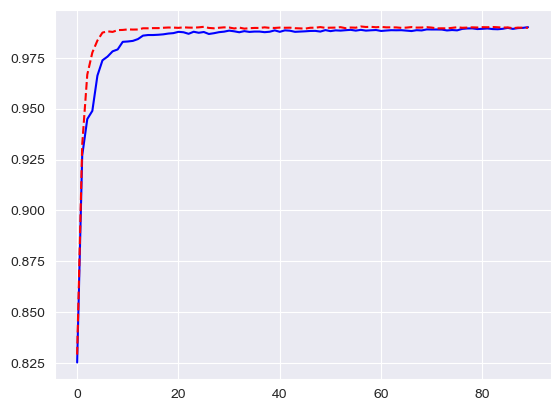

In [131]:
passive_mean = np.mean(passive_error, axis=1)
plt.plot(passive_mean, color='blue', label='passive')

active_mean = np.mean(active_errors, axis=1)
plt.plot(active_mean, color='red', label='active', linestyle='dashed')

plt.show()